In [1]:
using Revise
#addprocs(4)
using Walk1DMDP, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [127]:
mdp = Walk1D()
b = CBTSDPWBandit(mdp; k_action=1.0, alpha_action=0.5, fit_qs=true)
solver = ModularSolver(mdp, b; n_iterations=200)
policy = solve(solver, mdp);

In [128]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

Walk1DMDP.Walk1DState(0, 1.0)

In [129]:
hr = HistoryRecorder(; rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

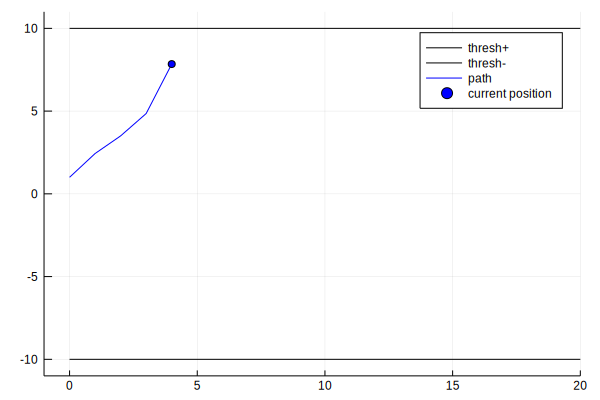

In [130]:
plot(mdp, h)

In [126]:
sum(h.reward_hist)

-13.93185787193715

## CBTSObserver

In [61]:
mdp = Walk1D()
observer = AQObserver(1)
b = CBTSDPWBandit(mdp; k_action=1.0, alpha_action=0.5, fit_qs=true, observer=observer)
solver = ModularSolver(mdp, b; n_iterations=50)
policy = solve(solver, mdp);

In [62]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)
a, info = action_info(policy, s0)

(0.6791074260357777, Dict{Symbol,Any}(Pair{Symbol,Any}(:tree_queries, 50),Pair{Symbol,Any}(:search_time_us, 0x0000000000004273),Pair{Symbol,Any}(:best_path, MCTS.BestPathTracker(Any[Walk1DMDP.Walk1DState(1, 0.829287)], Any[0.0187308], -0.919114, Any[], Any[], 0.0, 1.0, 1.0))))

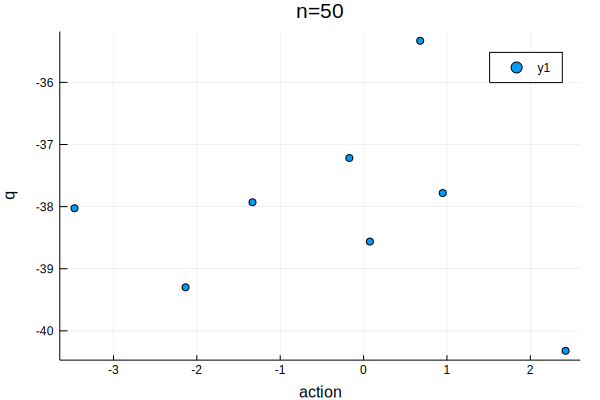

In [63]:
plot(observer, 50)

In [64]:
animate(observer; fps=4)

INFO: Saved animation to /Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif


Plots.AnimatedGif("/Users/rlee18/.julia/v0.6/CMDPs/notebooks/aqobserver.gif")

In [65]:
observer.Xs[10]

4-element Array{Float64,1}:
  0.679107
 -3.46737 
  2.42299 
 -1.33252 

In [66]:
observer.ys[5]

3-element Array{Float64,1}:
 -27.8906
 -37.169 
 -40.3213